In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
bgr = cv2.imread('Caras01.jpg')

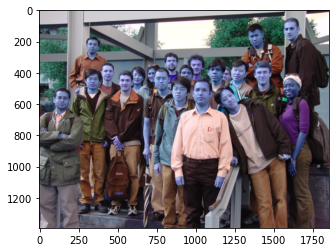

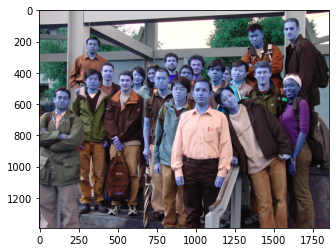

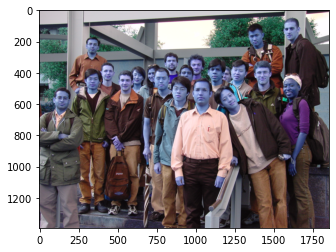

In [ ]:
# Image Smoothing

average_blur = cv2.blur(bgr,(5,5))
median_blur = cv2.medianBlur(bgr,5)
gaussian_blur = cv2.GaussianBlur(bgr,(5,5),0)

plt.imshow(average_blur)
plt.show()
plt.imshow(median_blur)
plt.show()
plt.imshow(gaussian_blur)
plt.show()

bgr = gaussian_blur

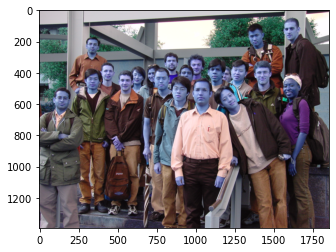

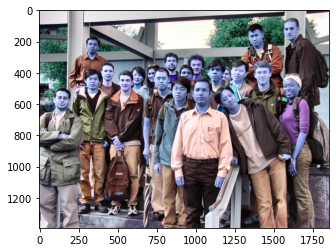

In [ ]:
#Contrast Fix

plt.imshow(bgr)
plt.show()

lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)

lab_channels = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (5, 5))

lab_channels[0] = clahe.apply(lab_channels[0])

lab = cv2.merge(lab_channels)

bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

plt.imshow(bgr)
plt.show()

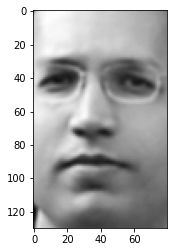

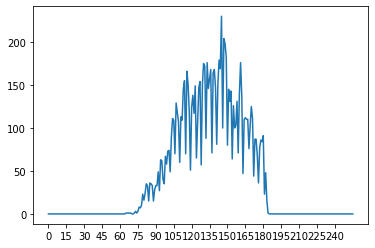

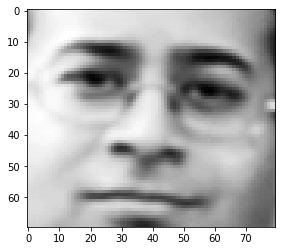

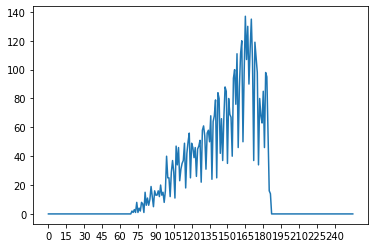

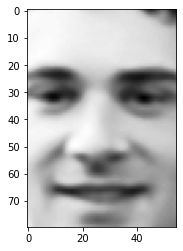

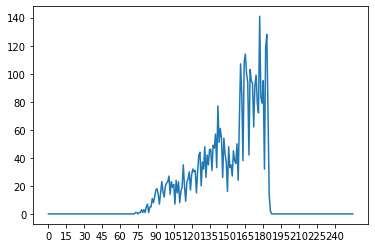

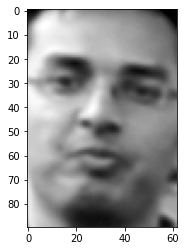

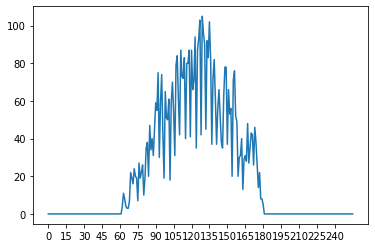

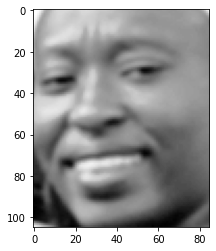

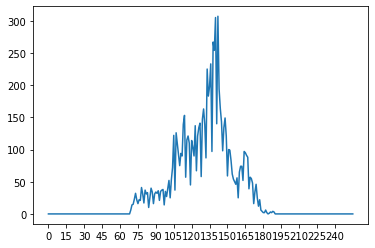

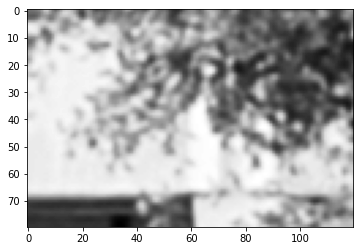

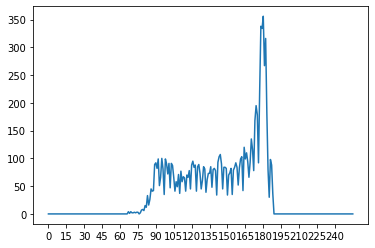

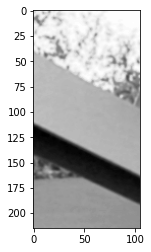

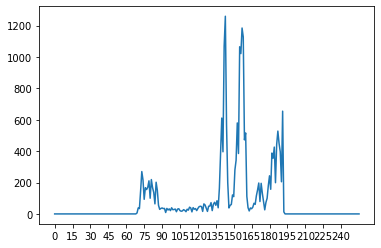

145
165
177
129
142
180
143


In [ ]:
ycrcb = cv2.cvtColor(lab, cv2.COLOR_BGR2YCrCb)

canal = 2

test = ycrcb[470:600, 1000:1080,:]
plt.imshow(test[:,:,canal], cmap="gray")
plt.show()

hst = cv2.calcHist([test],[canal],None,[256],[0,256])
plt.plot(hst)
plt.xticks(np.arange(255, step=15))
plt.show()

test2 = ycrcb[540:610, 110:190,:]
plt.imshow(test2[:,:,canal], cmap="gray")
plt.show()

hst2 = cv2.calcHist([test2],[canal],None,[256],[0,256])
plt.xticks(np.arange(255, step=15))
plt.plot(hst2)
plt.show()

test3 = ycrcb[420:500, 525:580,:]
plt.imshow(test3[:,:,canal], cmap="gray")
plt.show()

hst3 = cv2.calcHist([test3],[canal],None,[256],[0,256])
plt.xticks(np.arange(255, step=15))
plt.plot(hst3)
plt.show()

test4 = ycrcb[190:280, 313:375,:]
plt.imshow(test4[:,:,canal], cmap="gray")
plt.show()

hst4 = cv2.calcHist([test4],[canal],None,[256],[0,256])
plt.xticks(np.arange(255, step=15))
plt.plot(hst4)
plt.show()

test5 = ycrcb[455:560, 1565:1650,:]
plt.imshow(test5[:,:,canal], cmap="gray")
plt.show()

hst5 = cv2.calcHist([test5],[canal],None,[256],[0,256])
plt.xticks(np.arange(255, step=15))
plt.plot(hst5)
plt.show()

test6 = ycrcb[400:480, 0:120,:]
plt.imshow(test6[:,:,canal], cmap="gray")
plt.show()

hst6 = cv2.calcHist([test6],[canal],None,[256],[0,256])
plt.xticks(np.arange(255, step=15))
plt.plot(hst6)
plt.show()

test7 = ycrcb[95:310, 520:625,:]
plt.imshow(test7[:,:,canal], cmap="gray")
plt.show()

hst7 = cv2.calcHist([test7],[canal],None,[256],[0,256])
plt.xticks(np.arange(255, step=15))
plt.plot(hst7)
plt.show()

print(hst.tolist().index(max(hst).astype('int')[0]))
print(hst2.tolist().index(max(hst2).astype('int')[0]))
print(hst3.tolist().index(max(hst3).astype('int')[0]))
print(hst4.tolist().index(max(hst4).astype('int')[0]))
print(hst5.tolist().index(max(hst5).astype('int')[0]))
print(hst6.tolist().index(max(hst6).astype('int')[0]))
print(hst7.tolist().index(max(hst7).astype('int')[0]))

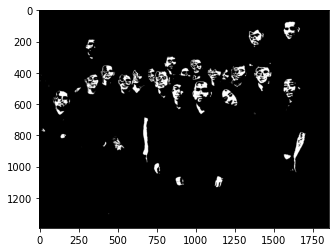

In [ ]:
#Skin Color Segmentation

#ycrcb = cv2.cvtColor(lab, cv2.COLOR_BGR2YCrCb)
height, width, depth = ycrcb.shape
bitmap = np.zeros((height, width))

Y_MIN = 148
Y_MAX = 154
CR_MIN = 114
CR_MAX = 130
CB_MIN = 100
CB_MAX = 179

for i in range(0, height):
  for j in range(0, width):
    if ((ycrcb[i,j,0]>=Y_MIN and ycrcb[i,j,0]<=Y_MAX) and (ycrcb[i,j,1]>=CR_MIN and ycrcb[i,j,1]<=CR_MAX) and (ycrcb[i,j,2]>=CB_MIN and ycrcb[i,j,2]<=CB_MAX)):
      bitmap[i,j] = 255

plt.imshow(bitmap, cmap="gray")
plt.show()

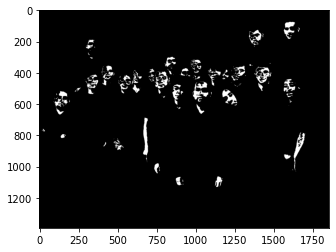

In [ ]:
kernel_erosion = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
erosion = cv2.erode(bitmap, kernel_erosion)
plt.imshow(erosion, cmap="gray")
plt.show()

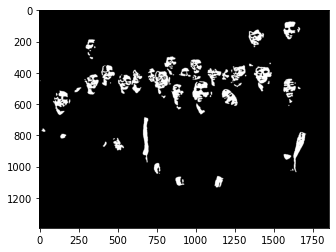

In [ ]:
kernel_dilation = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6,6))
dilation = cv2.dilate(erosion, kernel_dilation)
plt.imshow(dilation, cmap="gray")
plt.show()

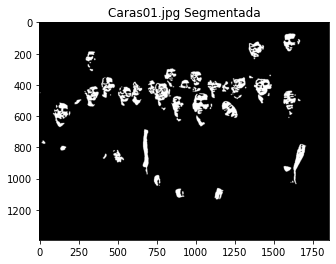

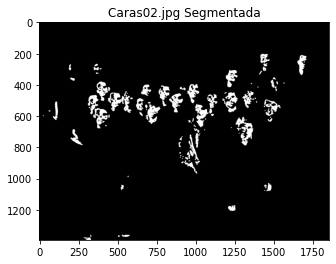

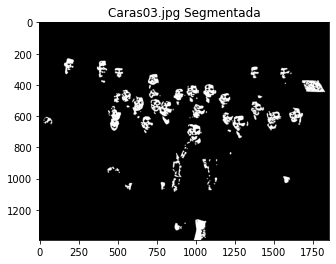

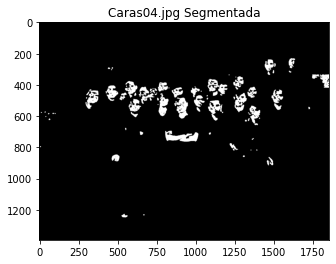

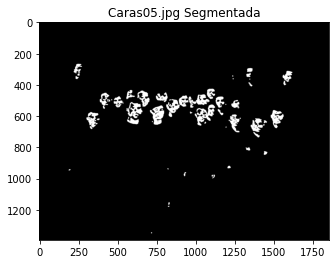

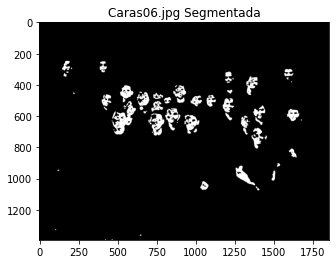

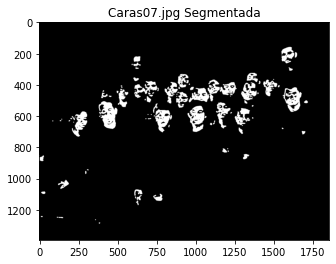

In [ ]:
def modelo(imagen):
  # # compare blur
  # average_blur = cv2.blur(bgr,(5,5))
  # median_blur = cv2.medianBlur(bgr,5)
  gaussian_blur = cv2.GaussianBlur(imagen,(5,5),0)

  bgr = gaussian_blur

  # contrast fix
  lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)

  # extract channels from lab
  lab_channels = cv2.split(lab)

  # ecualization of channel 0
  clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (5, 5))
  lab_channels[0] = clahe.apply(lab_channels[0])

  # merge channels
  lab = cv2.merge(lab_channels)

  # change space to BGR | YCrCb
  bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
  ycrcb = cv2.cvtColor(lab, cv2.COLOR_BGR2YCrCb)

  # bitmap with same shape from image
  height, width, depth = ycrcb.shape
  bitmap = np.zeros((height, width))

  # choose between range (from the faces)
  Y_MIN = 148
  Y_MAX = 154
  CR_MIN = 114
  CR_MAX = 130
  CB_MIN = 100
  CB_MAX = 179

  # generate binary image with values between face's range
  for i in range(0, height):
    for j in range(0, width):
      if ((ycrcb[i,j,0]>=Y_MIN and ycrcb[i,j,0]<=Y_MAX) and (ycrcb[i,j,1]>=CR_MIN and ycrcb[i,j,1]<=CR_MAX) and (ycrcb[i,j,2]>=CB_MIN and ycrcb[i,j,2]<=CB_MAX)):
        bitmap[i,j] = 255

  # erosion
  kernel_erosion = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
  erosion = cv2.erode(bitmap, kernel_erosion)

  # dilatation
  kernel_dilation = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6,6))
  dilation = cv2.dilate(erosion, kernel_dilation)

  return dilation

# img = cv2.imread('Caras01.jpg')
# result = modelo(img)

imagenes = ['Caras01.jpg', 'Caras02.jpg', 'Caras03.jpg', 'Caras04.jpg', 'Caras05.jpg', 'Caras06.jpg', 'Caras07.jpg', ]

# run model for each image
# for i in imagenes:
#     img = cv2.imread(i)
#     plt.imshow(modelo(img), cmap="gray")
#     plt.title(i+' Segmentada')
#     # plt.savefig(i[0:7]+'_segmentada.jpg')
#     plt.show()

-----------------------------------
Imagen 1
Hay 2460698 True Positive
Hay 39989 False Positive
Hay 82865 False Negative


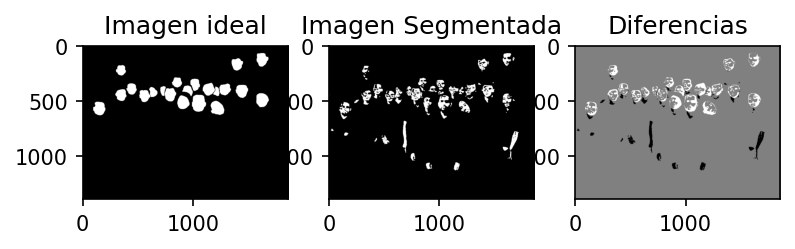

F1 score: 0.97564
-----------------------------------
Imagen 2
Hay 2469782 True Positive
Hay 36454 False Positive
Hay 77316 False Negative


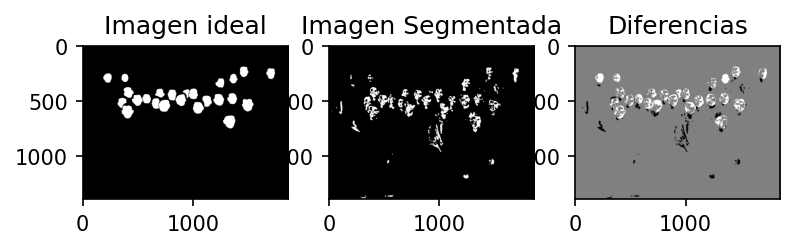

F1 score: 0.97749
-----------------------------------
Imagen 3
Hay 2485015 True Positive
Hay 41876 False Positive
Hay 56661 False Negative


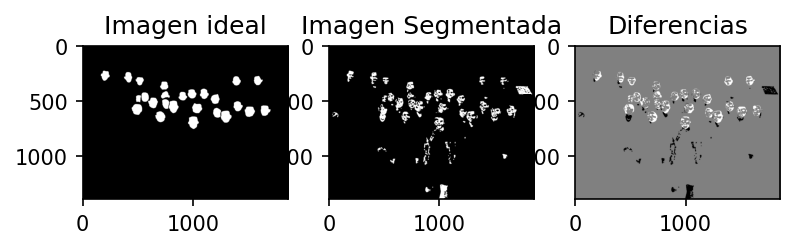

F1 score: 0.98056
-----------------------------------
Imagen 4
Hay 2502110 True Positive
Hay 32744 False Positive
Hay 48698 False Negative


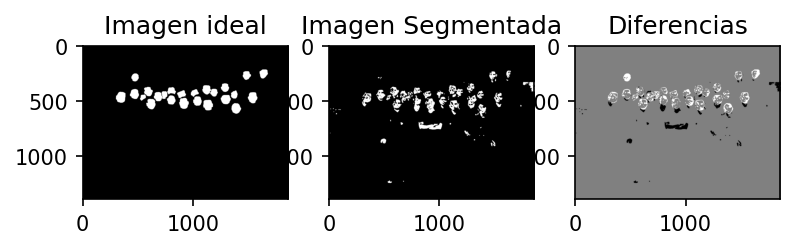

F1 score: 0.98399
-----------------------------------
Imagen 5
Hay 2513546 True Positive
Hay 11457 False Positive
Hay 58549 False Negative


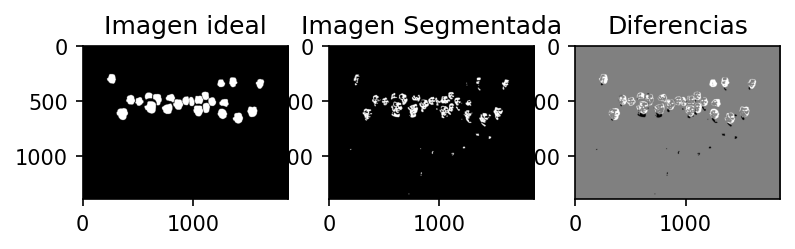

F1 score: 0.98627
-----------------------------------
Imagen 6
Hay 2496585 True Positive
Hay 24388 False Positive
Hay 62579 False Negative


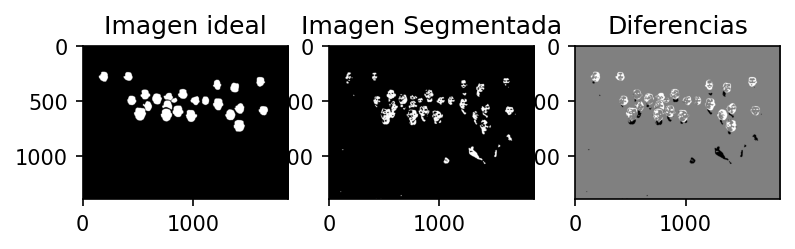

F1 score: 0.98288
-----------------------------------
Imagen 7
Hay 2474202 True Positive
Hay 29890 False Positive
Hay 79460 False Negative


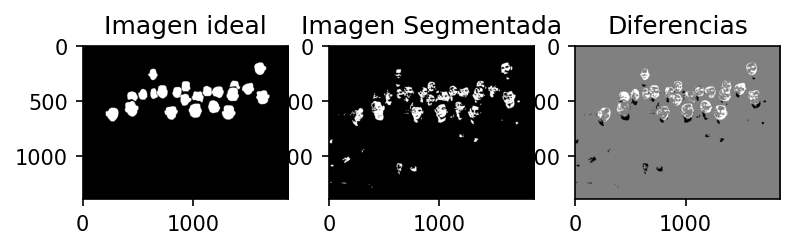

F1 score: 0.97838


In [ ]:
f1_scores = []

for i in range(7):

    refer = cv2.imread('Refer0'+str(i+1)+'.bmp')
    refer = cv2.cvtColor(refer, cv2.COLOR_BGR2GRAY)

    # transformar a una imagen binaria
    img_bin_ideal = refer > 127 # modificar
    img = cv2.imread('Caras0'+str(i+1)+'.jpg')
    img_ideal_segmentada = modelo(img) > 127 # modificar

    # dejamos valores en ceros y unos
    img_bin_ideal = img_bin_ideal*1
    img_ideal_segmentada = img_ideal_segmentada*1

    # calcular diferencias
    diferencias = img_bin_ideal -  img_ideal_segmentada

    # calcular estadisticas
    TP = np.sum(diferencias == 0)
    FP = np.sum(diferencias == -1)
    FN = np.sum(diferencias == 1)

    print('-----------------------------------')
    print('Imagen '+ str(i+1))
    print('Hay {} True Positive'.format(TP))
    print('Hay {} False Positive'.format(FP))
    print('Hay {} False Negative'.format(FN))

    # despliegue de imagenes
    fig, ax = plt.subplots(nrows=1, ncols=3, dpi=150)
    ax[0].imshow(img_bin_ideal, cmap='gray')
    ax[1].imshow(img_ideal_segmentada, cmap='gray')
    ax[2].imshow(diferencias, cmap='gray')

    ax[0].set_title('Imagen ideal')
    ax[1].set_title('Imagen Segmentada')
    ax[2].set_title('Diferencias')
    # plt.savefig('Diferencias_imagen'+str(i)+'.jpg')
    plt.show()

    TPR = TP / (TP + FN)
    P = TP / (FP + TP)
    F1_score = 2 * (TPR * P) / (TPR + P)

    f1_scores.append(F1_score)

    print('F1 score: {}'.format(round(F1_score, 5)))
    

In [ ]:
f1_scores

[0.9756447440154632,
 0.9774861507274208,
 0.9805591994739341,
 0.983985958956769,
 0.9862655181438537,
 0.9828809734855575,
 0.9783797313985615]

Hay 2460698 True Positive
Hay 82865 False Positive
Hay 39989 False Negative


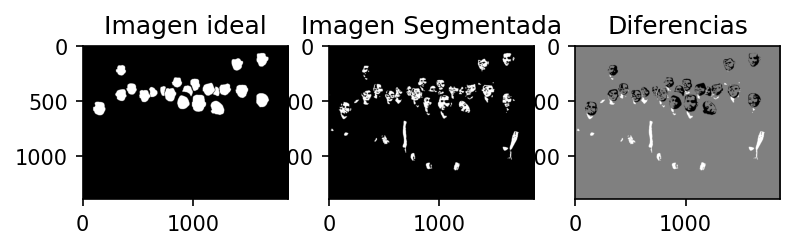

F1 score: 0.97564


In [ ]:
# transformar a una imagen binaria
img_bin_ideal = cv2.imread('Refer01.bmp')
img_bin_ideal = cv2.cvtColor(img_bin_ideal, cv2.COLOR_BGR2GRAY)
img_ideal_segmentada = result

# transformar a una imagen binaria
img_bin_ideal = img_bin_ideal > 127 # must be 0 or 255
img_ideal_segmentada = img_ideal_segmentada > 127 # must be 0 or 255

# dejamos valores en ceros y unos
img_bin_ideal = img_bin_ideal*1
img_ideal_segmentada = img_ideal_segmentada*1

# calcular diferencias
diferencias = img_ideal_segmentada - img_bin_ideal

# calcular estadisticas
TP = np.sum(diferencias == 0)
FP = np.sum(diferencias == -1)
FN = np.sum(diferencias == 1)

print('Hay {} True Positive'.format(TP))
print('Hay {} False Positive'.format(FP))
print('Hay {} False Negative'.format(FN))

# despliegue de imagenes
fig, ax = plt.subplots(nrows=1, ncols=3, dpi=150)
ax[0].imshow(img_bin_ideal, cmap='gray')
ax[1].imshow(img_ideal_segmentada, cmap='gray')
ax[2].imshow(diferencias, cmap='gray')

ax[0].set_title('Imagen ideal')
ax[1].set_title('Imagen Segmentada')
ax[2].set_title('Diferencias')
plt.show()

TPR = TP / (TP + FN)
P = TP / (FP + TP)
F1_score = 2 * (TPR * P) / (TPR + P)

print('F1 score: {}'.format(round(F1_score, 5)))

In [ ]:
# F1 score: 0.97564